# Question 1: What are the most popular Airbnb locations in Berlin?
The first question around the Airbnb Berlin data set is about identifying __areas of the city that are more popular than others__. The results may work as __guidance__ for people who are interested in __renting out apartments__ either privately or professionally.

The steps involved in this notebook are as follows:
* Load libraries
* Import & understand data
* Pre-process data
* Model data
* Analyze data & evaluate results

## Load Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import & Understand Data

In [35]:
# Import listings data (Source: http://insideairbnb.com/get-the-data.html)
df_listings = pd.read_csv('../data/listings_berlin.csv')

# Preview data
print(df_listings.shape)
pd.options.display.max_columns = None
df_listings.head(1)

(22572, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20180912025131,2018-09-12,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,6 weeks ago,t,5,34,64,154,2018-09-12,109,2016-04-11,2018-09-08,92.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,3.69


### Overview
There are multiple columns in the data set that appear to be very useful for answering the question posed at the beginning of this notebook. However, before comparing different areas of Berlin with each other it's important to __define the term "popularity"__. In particular, the popularity of an area is influenced by __three main features__, whereas an increase in each of them increases popularity and vice versa. These feature are:

* The __number of apartments__
* The __booking frequency__
* The __booking satisfaction__

__Attributes__ in the Airbnb data set that can be used to __estimate__ the popularity of different areas are:
* neighbourhood_group_cleansed
* minimum_nights, reviews_per_month
* review_scores_rating

## Pre-Process Data

In [36]:
# Check distriutions of property types
df_listings["property_type"].value_counts().sort_values(ascending=False).head()

Apartment             20317
Condominium             603
Loft                    423
House                   409
Serviced apartment      191
Name: property_type, dtype: int64

In [37]:
# Keep only apartments in analysis
n_all = df_listings.shape[0]
df_listings = df_listings[df_listings["property_type"] == "Apartment"]
print("{} records were removed from the Airbnb Berlin listings data frame.".format(n_all - df_listings.shape[0]))

2255 records were removed from the Airbnb Berlin listings data frame.


In [38]:
# Adjust values of "neighbourhood_group_cleansed" (needs to be in correct form for later use)
df_listings["neighbourhood_group_cleansed"] = df_listings["neighbourhood_group_cleansed"].astype(str).str.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")
df_listings["neighbourhood_group_cleansed"] = df_listings["neighbourhood_group_cleansed"].astype(str).str.replace(" ", "")

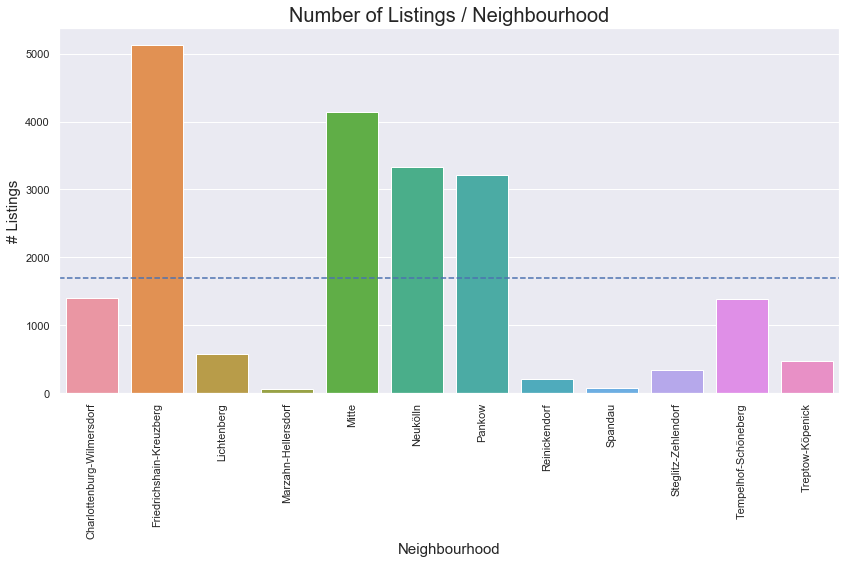

In [39]:
# Number of listings / neighbourhood
listings_neighbourhood = df_listings[["neighbourhood_group_cleansed","id"]]
listings_neighbourhood = listings_neighbourhood.groupby("neighbourhood_group_cleansed", as_index=False).agg("count")
listings_neighbourhood.columns = ["neighbourhood_group", "num_listings"]

# Plot
plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.barplot(x="neighbourhood_group", y="num_listings", data=listings_neighbourhood)
plt.xticks(rotation=90);
plt.title("Number of Listings / Neighbourhood", fontsize=20)
plt.ylabel("# Listings", fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.tight_layout()

# Add median as reference line
ax.axhline(listings_neighbourhood["num_listings"].mean(), ls='--');

In [40]:
# Column "reviews_per_month" can only be used as proxy for booking frequency if
# it doesn't exceed to the maximum monthly availability of each listing

# Fill missing values with 0
df_listings["reviews_per_month"] = df_listings["reviews_per_month"].fillna(0)

# Define adjusted proxy for number of bookings per months
df_listings["max_bookings_per_month"] = (30.42 / df_listings["minimum_nights"]).fillna(0)
df_listings["bookings_per_month"] = df_listings[["max_bookings_per_month","reviews_per_month"]].min(axis=1)
df_listings = df_listings.drop("max_bookings_per_month", axis=1)

df_listings["bookings_per_month"].describe()

count    20317.000000
mean         0.885989
std          1.337913
min          0.000000
25%          0.060000
50%          0.330000
75%          1.080000
max         14.790000
Name: bookings_per_month, dtype: float64

In [86]:
# Calculate the monthly occupancy rate for each listing
df_listings["occupancy_rate"] = (df_listings["bookings_per_month"] * df_listings["minimum_nights"] / 30.42).fillna(0)
df_listings["occupancy_rate"].describe()
df_listings["popularity_score"] = df_listings["occupancy_rate"]

In [85]:
# Calculate popularity score as average of occupancy and rating
# Before I am applying a min-max scaling
# Scaled occupancy rate
df_listings["occupancy_rate_normed"] = ((df_listings["occupancy_rate"] - df_listings["occupancy_rate"].min()) /
                                        (df_listings["occupancy_rate"].max()-df_listings["occupancy_rate"].min()))

# Scaled review scores rating
df_listings["review_scores_rating"] = df_listings["review_scores_rating"].fillna(0)
df_listings["review_scores_rating_normed"] = ((df_listings["review_scores_rating"] - df_listings["review_scores_rating"].min()) /
                                              (df_listings["review_scores_rating"].max()-df_listings["review_scores_rating"].min()))

# Popularity score as weighted average
df_listings["popularity_score"] = (3*df_listings["occupancy_rate_normed"] + df_listings["review_scores_rating_normed"]) / 4
df_listings = df_listings.drop(["occupancy_rate_normed", "review_scores_rating_normed"], axis=1)

df_listings["popularity_score"].describe()

count    20317.000000
mean         0.257833
std          0.172326
min          0.000000
25%          0.225636
50%          0.263807
75%          0.318506
max          1.000000
Name: popularity_score, dtype: float64

In [44]:
# Create data frame with area in square kilometre of neighbourhood groups
# Source: https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins
hood_names = ['Pankow','Tempelhof-Schöneberg','Friedrichshain-Kreuzberg','Neukölln','Mitte','Charlottenburg-Wilmersdorf',
              'Treptow-Köpenick','Lichtenberg','Reinickendorf','Steglitz-Zehlendorf','Marzahn-Hellersdorf','Spandau']
hood_size = [103.01,53.09,20.16,44.93,39.47,103.01,168.42,52.29,89.46,102.50,61.74,91.91]
hood_area = pd.DataFrame({"neighbourhood_group": hood_names, "area_km2": hood_size})
hood_area = hood_area.sort_values("neighbourhood_group").reset_index(drop=True)
hood_area.head()

,neighbourhood_group,area_km2
0,Charlottenburg-Wilmersdorf,103.01
1,Friedrichshain-Kreuzberg,20.16
2,Lichtenberg,52.29
3,Marzahn-Hellersdorf,61.74
4,Mitte,39.47


In [89]:
# Create data frame with occupancy rate and listing density for each neighbourhood
# Grouping functions
f = {"id":["count"], "popularity_score":["mean"], "review_scores_rating":["mean"]}

# Grouping data
hood_popularity = df_listings[["neighbourhood_group_cleansed","id","popularity_score","review_scores_rating"]]
hood_popularity = hood_popularity.groupby("neighbourhood_group_cleansed", as_index=False).agg(f)
hood_popularity.columns = ["neighbourhood_group", "num_listings", "popularity_score","review_scores_rating"]
#hood_popularity["popularity_score"] = hood_popularity["popularity_score"] / hood_popularity["popularity_score"].max()
hood_popularity = hood_popularity.sort_values("neighbourhood_group")

# Calculate density
hood_popularity["area_km2"] = hood_area["area_km2"]
hood_popularity["listings_per_km2"] = hood_popularity["num_listings"] / hood_popularity["area_km2"]

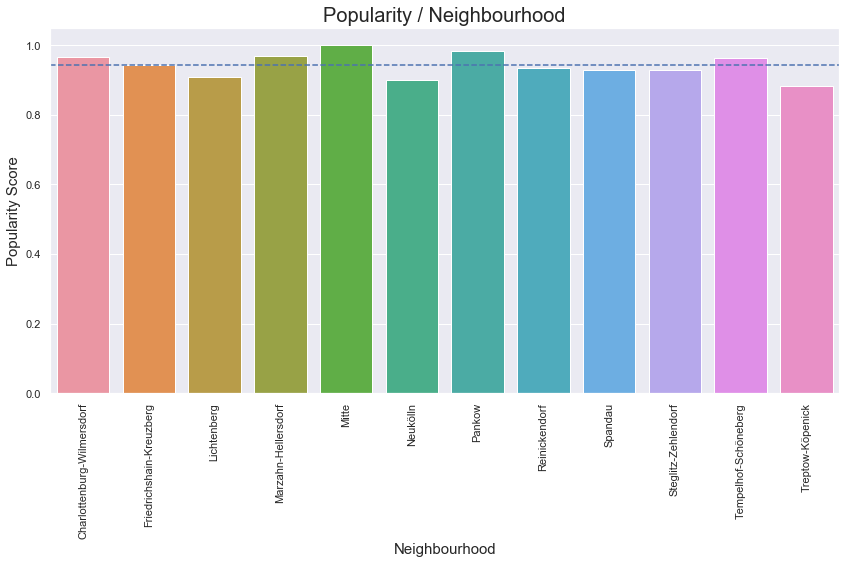

In [78]:
# Plot popularity scores across neihbourhoods
plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.barplot(x="neighbourhood_group", y="popularity_score", data=hood_popularity)
plt.xticks(rotation=90);
plt.title("Popularity / Neighbourhood", fontsize=20)
plt.ylabel("Popularity Score", fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.tight_layout()

# Add median as reference line
ax.axhline(hood_popularity["popularity_score"].mean(), ls='--');

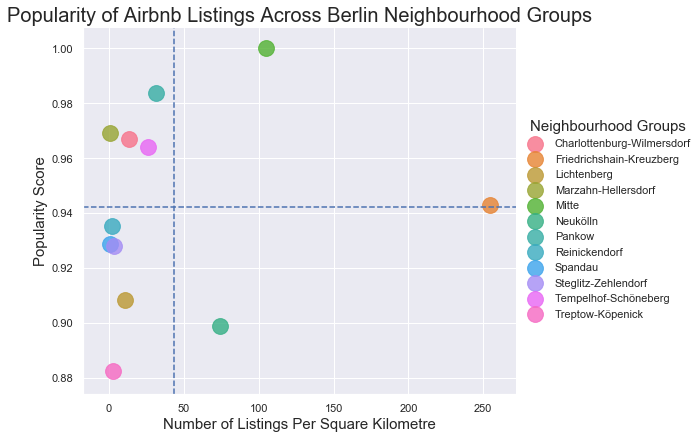

In [79]:
# Plot popularity score vs. listings per square kilometre
# Plot
sns.set(style="darkgrid")
p = sns.lmplot("listings_per_km2", "popularity_score", data=hood_popularity,
               hue="neighbourhood_group", fit_reg=False,
               height=6, aspect=1.2, scatter_kws={"s": 250})

# Add median as reference line
plt.axhline(hood_popularity["popularity_score"].mean(), ls='--');
plt.axvline(hood_popularity["listings_per_km2"].mean(), ls='--');

# Set labels
plt.title("Popularity of Airbnb Listings Across Berlin Neighbourhood Groups", fontsize=20)
plt.ylabel("Popularity Score", fontsize=15)
plt.xlabel("Number of Listings Per Square Kilometre", fontsize=15)
p._legend.set_title("Neighbourhood Groups")
plt.setp(p._legend.get_title(), fontsize=15);

## Analyses

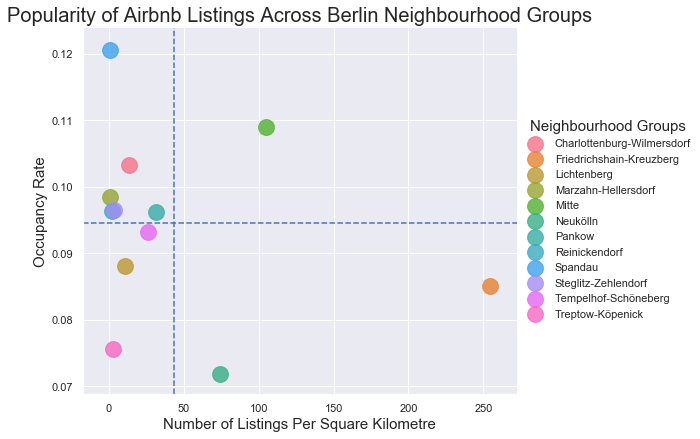

In [90]:
# Plot occupancy vs. listings per square kilometre
# Plot
sns.set(style="darkgrid")
p = sns.lmplot("listings_per_km2", "popularity_score", data=hood_popularity,
               hue="neighbourhood_group", fit_reg=False,
               height=6, aspect=1.2, scatter_kws={"s": 250})

# Add median as reference line
plt.axhline(hood_popularity["popularity_score"].mean(), ls='--');
plt.axvline(hood_popularity["listings_per_km2"].mean(), ls='--');

# Set labels
plt.title("Popularity of Airbnb Listings Across Berlin Neighbourhood Groups", fontsize=20)
plt.ylabel("Occupancy Rate", fontsize=15)
plt.xlabel("Number of Listings Per Square Kilometre", fontsize=15)
p._legend.set_title("Neighbourhood Groups")
plt.setp(p._legend.get_title(), fontsize=15);